In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
# Load the Dataset
df = pd.read_csv('data/modifiedIris2Classes.csv')

In [4]:
df.shape

(100, 5)

In [7]:
# Splitting data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=0)

In [8]:
# Standardize the Data
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Logistic Regression
# instance of the Model
clf = LogisticRegression()

In [11]:
clf.fit(X_train, y_train)

LogisticRegression()

In [12]:
X_test[0].reshape(1, -1)

array([[-0.12093628]])

In [13]:
print('prediction', clf.predict(X_test[0].reshape(1, -1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1, -1)))

prediction 0
probability [[0.52720087 0.47279913]]


In [14]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [15]:
example_df.head()

,petal length (cm),target,logistic_preds
0,-0.120936,0,0.472799
1,0.846554,1,0.950658
2,0.000000,0,0.568197
3,2.055917,1,0.998879
4,1.330299,1,0.988926


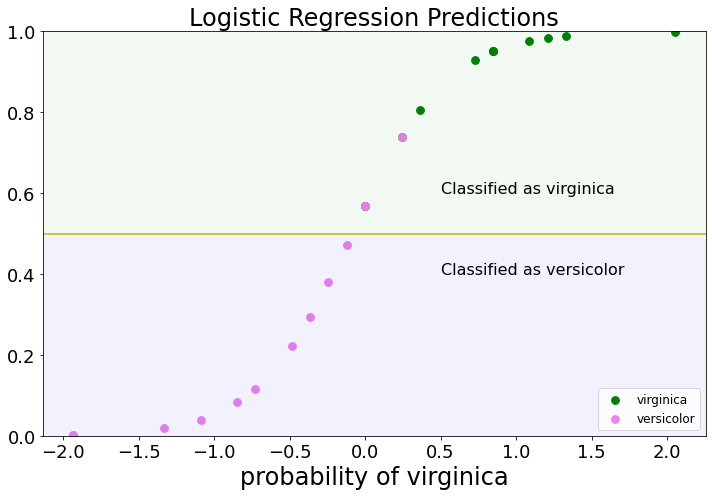

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values, example_df.loc[virginicaFilter, 'logistic_preds'].values, color='green', s=60, label='virginica')

ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values, example_df.loc[versicolorFilter, 'logistic_preds'].values, color='violet', s=60, label='versicolor')

ax.axhline(y=.5, c='y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as virginica', fontsize=16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize=16)

ax.set_ylim(0, 1)
ax.legend(loc='lower right', markerscale=1.0, fontsize=12)
ax.tick_params(labelsize=18)
ax.set_xlabel('petal length (cm)', fontsize=24)
ax.set_xlabel('probability of virginica', fontsize=24)
ax.set_title('Logistic Regression Predictions', fontsize=24)
fig.tight_layout()


In [21]:
# Measuring Model Performance
score = clf.score(X_test, y_test)
print(score)

0.88


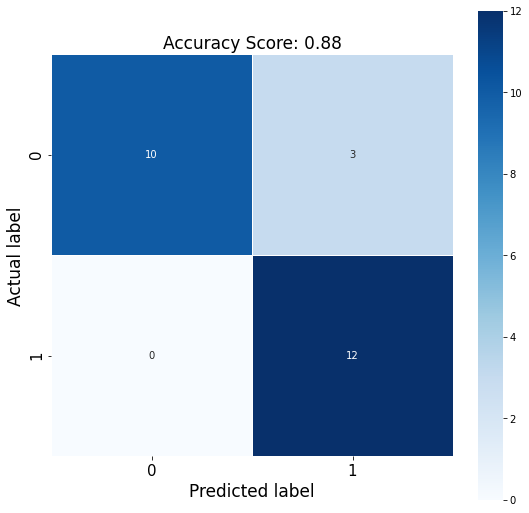

In [23]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
plt.title(f'Accuracy Score: {score}', size=17)
plt.tick_params(labelsize=15)